## Netflix Data Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\onlin\miniconda3\envs\datavisual\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv('netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


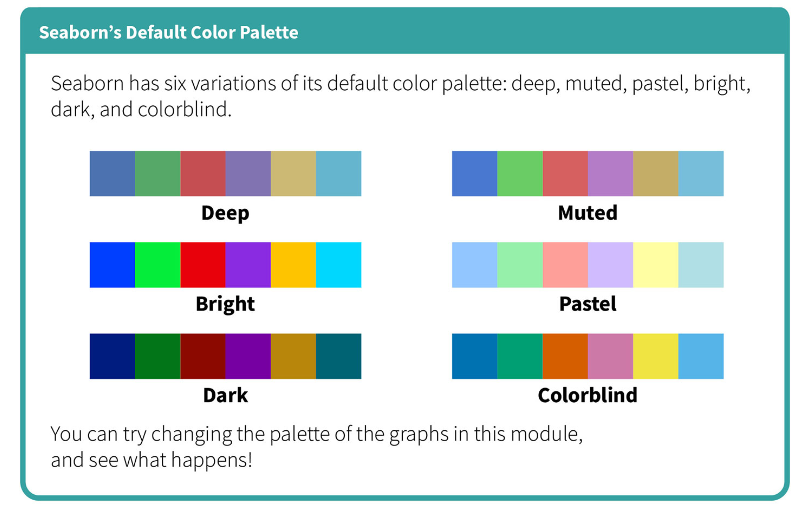

In [22]:
movies_df = df[df['type'] == 'Movie']
top10countries_movies = movies_df.groupby(['country']).size().sort_values(ascending=False)[0:10]
top10countries_movies

country
United States     1850
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
dtype: int64

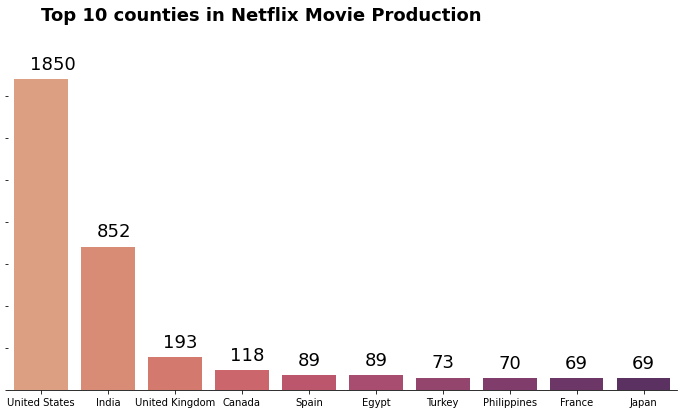

In [18]:
movies_df = df[df['type'] == 'Movie']
top10countries_movies = movies_df.groupby(['country']).size().sort_values(ascending=False)[0:10]

plt.figure(figsize = (12,6))
g = sns.barplot(x=top10countries_movies.index, y=top10countries_movies, 
                palette ="flare")
g.text(0, 2200, 'Top 10 counties in Netflix Movie Production',
      fontsize=18, fontweight='bold', color='black')
for i in['top', 'left', 'right']:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
          i.get_height()+60,
          round(i.get_height()),
           fontsize='18')
g.set(yticklabels=[])
plt.xlabel('')
plt.ylabel('')
plt.show()

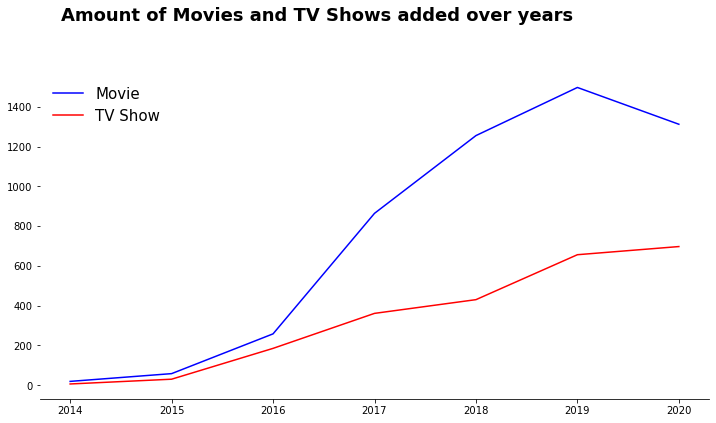

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
index = [2014,2015,2016,2017,2018,2019,2020]

# Movies added from 2014 to 2020
ts_df = df[df['year_added']>2013]
ts_df = ts_df[ts_df['year_added']<2021].groupby('type')['year_added'].value_counts().unstack().T

fig, ax = plt.subplots(1,1, figsize=(12,6))
fig.text(0.15,1, 'Amount of Movies and TV Shows added over years',
        fontsize=18, fontweight='bold', color='black')

# Line charts
g1= sns.lineplot(x=ts_df.index,y=ts_df['Movie'], color='blue',label='Movie')
g1= sns.lineplot(x=ts_df.index,y=ts_df['TV Show'], color='red',label='TV Show')

for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)

ax.legend(loc='upper left',frameon=False,prop={'size': 15})
plt.xlabel('')
plt.ylabel('')
plt.show()